<a href="https://colab.research.google.com/github/tajrink/summer_microcredential/blob/main/Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
#load libraries

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [147]:
#load data

In [148]:
df=pd.read_csv('https://raw.githubusercontent.com/tajrink/data_ml/main/diabetic_data.csv')

In [149]:
####

In [150]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [151]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [152]:
df.tail()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [153]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [154]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [155]:
df.shape

(101766, 50)

In [156]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [157]:
df=df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
         'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
         'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
         'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
         'metformin-rosiglitazone', 'metformin-pioglitazone','weight','payer_code','medical_specialty','diag_1','diag_2', 'diag_3','change',
         'patient_nbr','number_outpatient', 'number_inpatient', 'number_emergency'], axis=1)

In [158]:
df['readmitted'] = df['readmitted'].replace(['NO'], 0 )
df['readmitted'] = df['readmitted'].replace(['<30'], 1 )
df['readmitted'] = df['readmitted'].replace(['>30'], 2 )


In [159]:
df = df[df['gender'] != 'Unknown/Invalid']

In [160]:
df['gender']=df['gender'].replace(['Male'],0)
df['gender']=df['gender'].replace(['Female'],1)

In [161]:
df['age'] = df['age'].replace(['[0-10)'], 0 )
df['age'] = df['age'].replace(['[10-20)'], 1 )
df['age'] = df['age'].replace(['[20-30)'], 2 )
df['age'] = df['age'].replace(['[30-40)'], 3)
df['age'] = df['age'].replace(['[40-50)'], 4)
df['age'] = df['age'].replace(['[50-60)'], 5)
df['age'] = df['age'].replace(['[60-70)'], 6)
df['age'] = df['age'].replace(['[70-80)'], 7)
df['age'] = df['age'].replace(['[80-90)'], 8)
df['age'] = df['age'].replace(['[90-100)'], 9)


In [162]:
df = df[df['race'] != '?']

In [163]:
df['race'] = df['race'].replace(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'], (0,1,2,3,4) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [166]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

In [167]:
df['insulin'] = df['insulin'].replace('No', 0)
df['insulin'] = df['insulin'].replace('Steady', 1)
df['insulin'] = df['insulin'].replace('Up', 1)
df['insulin'] = df['insulin'].replace('Down', 1)


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              99492 non-null  int64
 1   race                      99492 non-null  int64
 2   gender                    99492 non-null  int64
 3   age                       99492 non-null  int64
 4   admission_type_id         99492 non-null  int64
 5   discharge_disposition_id  99492 non-null  int64
 6   admission_source_id       99492 non-null  int64
 7   time_in_hospital          99492 non-null  int64
 8   num_lab_procedures        99492 non-null  int64
 9   num_procedures            99492 non-null  int64
 10  num_medications           99492 non-null  int64
 11  number_diagnoses          99492 non-null  int64
 12  max_glu_serum             99492 non-null  int64
 13  A1Cresult                 99492 non-null  int64
 14  insulin                   99492 non-n

In [169]:
##### visualization atleast 3

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

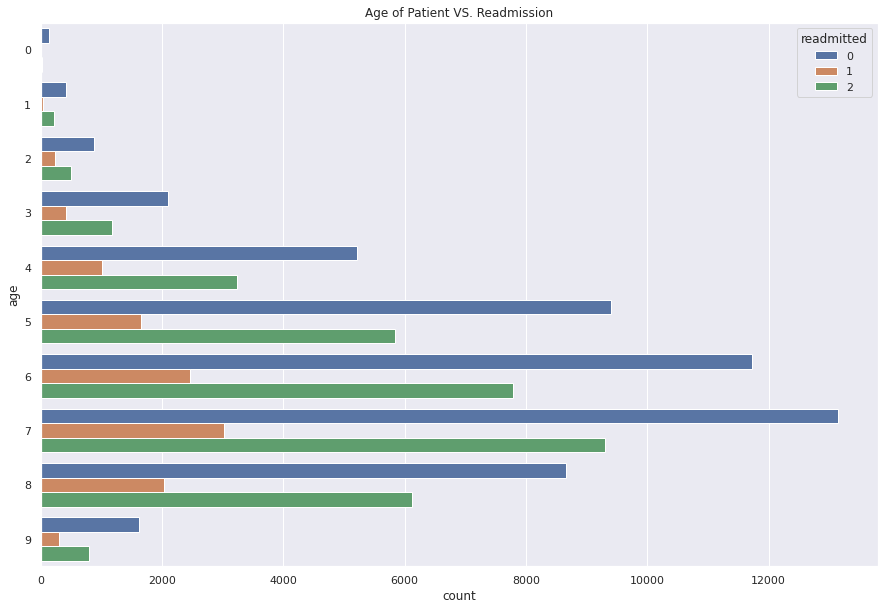

In [170]:
#Age and Readmission
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

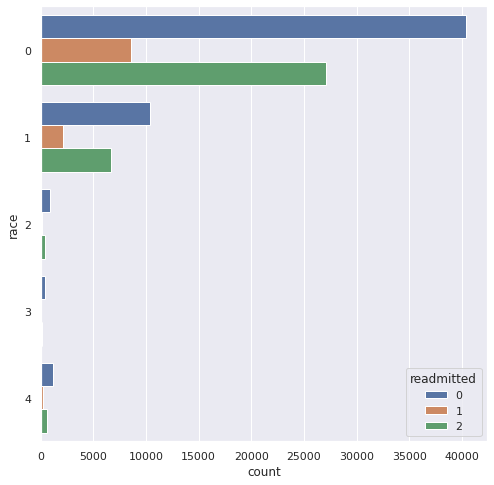

In [171]:
#Ethnicity of patient and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

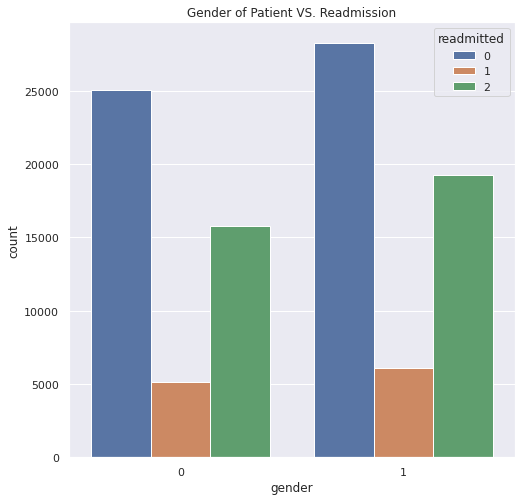

In [172]:
#Gender and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

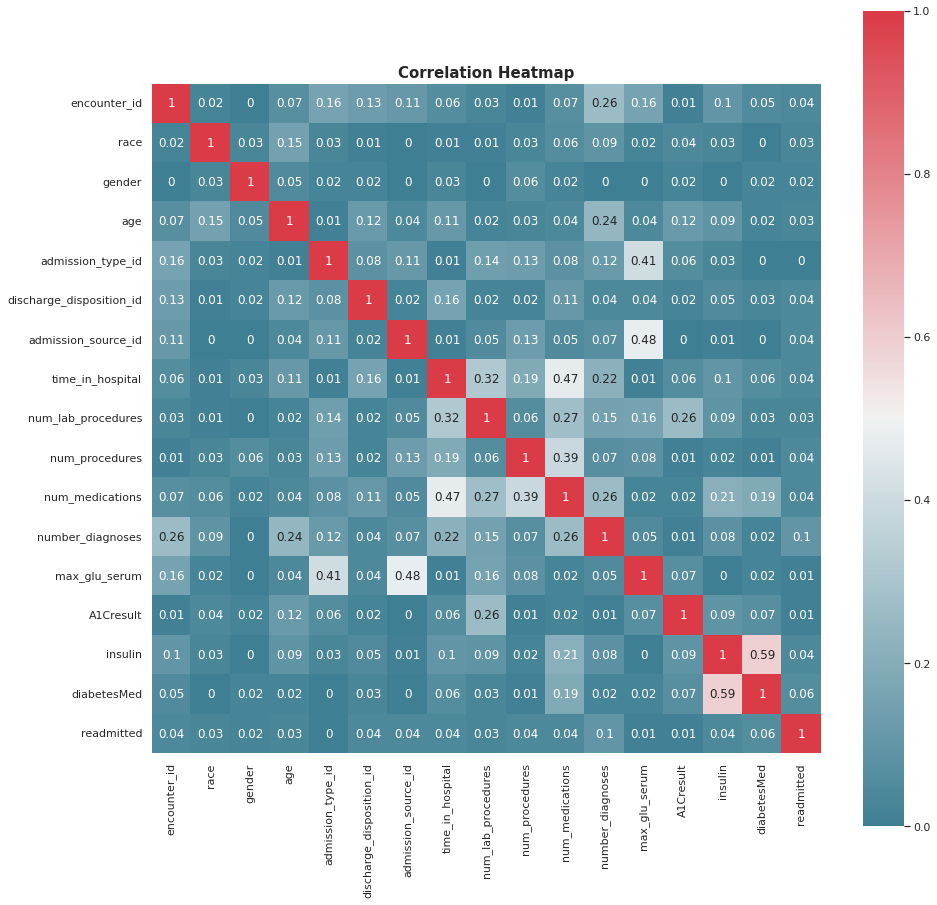

In [173]:
correlation = abs(round(df.corr(), 2))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot = True, square=True, cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

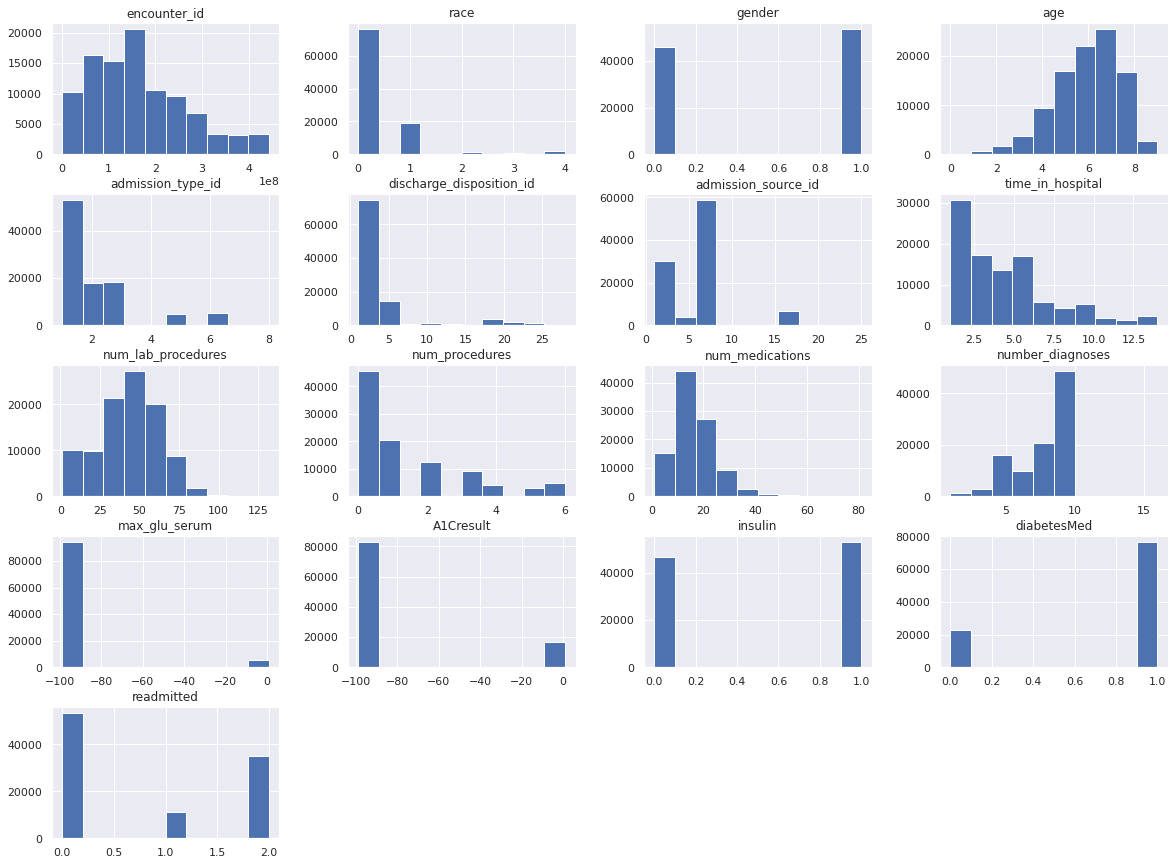

In [174]:
df.hist(figsize=(20,15));

In [175]:
#### train_test split 

In [176]:
from sklearn.model_selection import train_test_split

X=df.drop('readmitted', axis=1)

y=df['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [177]:
##scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [178]:
scaled_x_train=scaler.transform(X_train)

In [179]:
scaled_x_test=scaler.transform(X_test)

In [180]:
### prediction
from sklearn.metrics import classification_report,confusion_matrix

In [181]:
#### random forest model

In [182]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
### prediction

In [184]:
rfc_pred=rfc.predict(X_test)

In [185]:
print(confusion_matrix(y_test,rfc_pred))

[[12730    56  3312]
 [ 2190    60  1084]
 [ 6477    47  3892]]


In [186]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68     16098
           1       0.37      0.02      0.03      3334
           2       0.47      0.37      0.42     10416

    accuracy                           0.56     29848
   macro avg       0.48      0.39      0.38     29848
weighted avg       0.53      0.56      0.52     29848



In [187]:
###knn model

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [189]:
### prediction

In [190]:
pred=knn.predict(X_test)

In [191]:
print(confusion_matrix(y_test,pred))

[[8826 1731 5541]
 [1819  352 1163]
 [5393 1140 3883]]


In [192]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55     16098
           1       0.11      0.11      0.11      3334
           2       0.37      0.37      0.37     10416

    accuracy                           0.44     29848
   macro avg       0.34      0.34      0.34     29848
weighted avg       0.44      0.44      0.44     29848



In [193]:
####

In [194]:
error_rate=[]

for i in range(1,20):

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append (np.mean(pred_i != y_test))

KeyboardInterrupt: ignored

ValueError: ignored

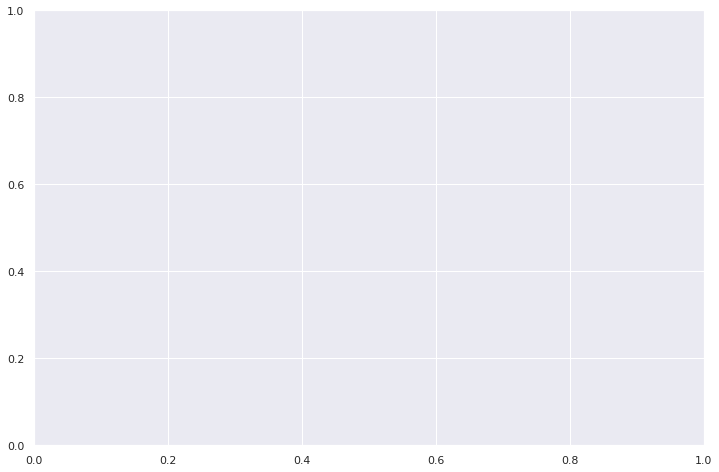

In [202]:
plt.figure(figsize=(12,8))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [195]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 1
[[8826 1731 5541]
 [1819  352 1163]
 [5393 1140 3883]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     16098
           1       0.11      0.11      0.11      3334
           2       0.37      0.37      0.37     10416

    accuracy                           0.44     29848
   macro avg       0.34      0.34      0.34     29848
weighted avg       0.44      0.44      0.44     29848



In [196]:
#accuracy
from sklearn.metrics import accuracy_score

In [197]:
knn1= accuracy_score(y_test,pred)

In [198]:
knn1

0.4375837577057089

In [199]:
###conclusion

In [200]:
#reference:
# https://github.com/zachzazueta/Diabetes_Readmittance_Predictions/blob/master/Zazueta%20-%20Mod%205%20Project.ipynb
# https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission


